In [1]:
from typing import Dict, List
from json import loads
import requests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_digit_list(list_str: str) -> List[int]:
    digit_list = []
    str_list = list_str.strip("[]").split(", ")
    for string in str_list:
        if string.find(".") != -1:
            digit_list.append(float(string))
        else:
            digit_list.append(int(string))
    return digit_list

In [5]:
def read_data(file_path: str) -> Dict:
    data = {}
    with open(file_path, "r") as data_file:
        data_lines = data_file.read().splitlines()[286:]
    for data_line in data_lines:
        data_line = data_line.rstrip()
        index = data_line.find(": ")
        key = data_line[:index]
        value = data_line[index+2:]
        if value.isdigit():
            data[key] = int(value)
        else:
            data[key] = get_digit_list(value)
    return data


In [6]:
DATA_PATH = "/home/ubuntu/GitLab/ssl_interception/python_scripts/all_ca_data_v3.txt"
data = read_data(DATA_PATH)
data

{'num_intercept_certs': 150610,
 'non_intercept_conns': 1119718381,
 'num_non_intercept_certs': 9954432,
 'non_intercept_weak': 101055,
 'non_intercept_recommended': 3626,
 'non_intercept_secure': 88427,
 'non_intercept_insecure': 1,
 'TLS_DHE_RSA_WITH_AES_256_CBC_SHA': 1201,
 'TLS_RSA_WITH_AES_256_GCM_SHA384': 495040,
 'TLS_ECDHE_RSA_WITH_AES_128_CBC_SHA256': 5042,
 'TLS_ECDHE_ECDSA_WITH_AES_256_GCM_SHA384': 958970,
 'TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA': 1573,
 'TLS_ECDHE_RSA_WITH_AES_128_CBC_SHA': 8799,
 'TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256': 831276,
 'TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA384': 2364320,
 'TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256': 263974,
 'TLS_RSA_WITH_AES_128_CBC_SHA': 13555,
 'TLS_DHE_RSA_WITH_AES_256_GCM_SHA384': 171823,
 'TLS_RSA_WITH_AES_256_CBC_SHA': 310409,
 'TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384': 2892976,
 'validity_period_counts_long': [0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  2,
  2,
  0,
  3,
  0,
  2,
  0,
  0,
  4,
  0,
  3,
  0,
  1,
  0,
  0,
  1,
  0,


In [7]:
def get_cipher_suite_info(cipher_suites: List[str]) -> Dict[str, Dict]:
    #print(cipher_suites)
    cipher_suite_info = {}
    for cipher_suite in cipher_suites:
        url = f"https://ciphersuite.info/api/cs/{cipher_suite}"
        try:
            cipher_suite_info[cipher_suite] = loads(requests.get(url).content)[cipher_suite]["security"]
        except:
            cipher_suite_info[cipher_suite] = "Data Not Found"
    return cipher_suite_info

In [8]:
def get_cipher_suite_data(data: Dict):
    cipher_suites = {}
    for key, value in data.items():
        if key.find("TLS") != -1 or key.find("SSL") != -1:
            cipher_suites[key] = value
    return cipher_suites

In [9]:
cipher_suite_data = get_cipher_suite_data(data)
cipher_data_for_df = {"cipher": list(cipher_suite_data.keys()), "count": list(cipher_suite_data.values())}
cipher_df = pd.DataFrame.from_dict(cipher_data_for_df)
cipher_security = get_cipher_suite_info(cipher_df["cipher"].unique())

In [10]:
cipher_df["security"] = cipher_df["cipher"].map(cipher_security)
cipher_df

,cipher,count,security
0,TLS_DHE_RSA_WITH_AES_256_CBC_SHA,1201,weak
1,TLS_RSA_WITH_AES_256_GCM_SHA384,495040,weak
2,TLS_ECDHE_RSA_WITH_AES_128_CBC_SHA256,5042,weak
3,TLS_ECDHE_ECDSA_WITH_AES_256_GCM_SHA384,958970,recommended
4,TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA,1573,weak
5,TLS_ECDHE_RSA_WITH_AES_128_CBC_SHA,8799,weak
6,TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256,831276,secure
7,TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA384,2364320,weak
8,TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256,263974,recommended
9,TLS_RSA_WITH_AES_128_CBC_SHA,13555,weak


In [11]:
colors = {
    "recommended": "tab:green",
    "secure": "tab:blue",
    "insecure": "tab:red",
    "weak": "tab:orange"
}

In [12]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Text(0.5, 1.0, 'Cipher Suites Used by Middleboxes')

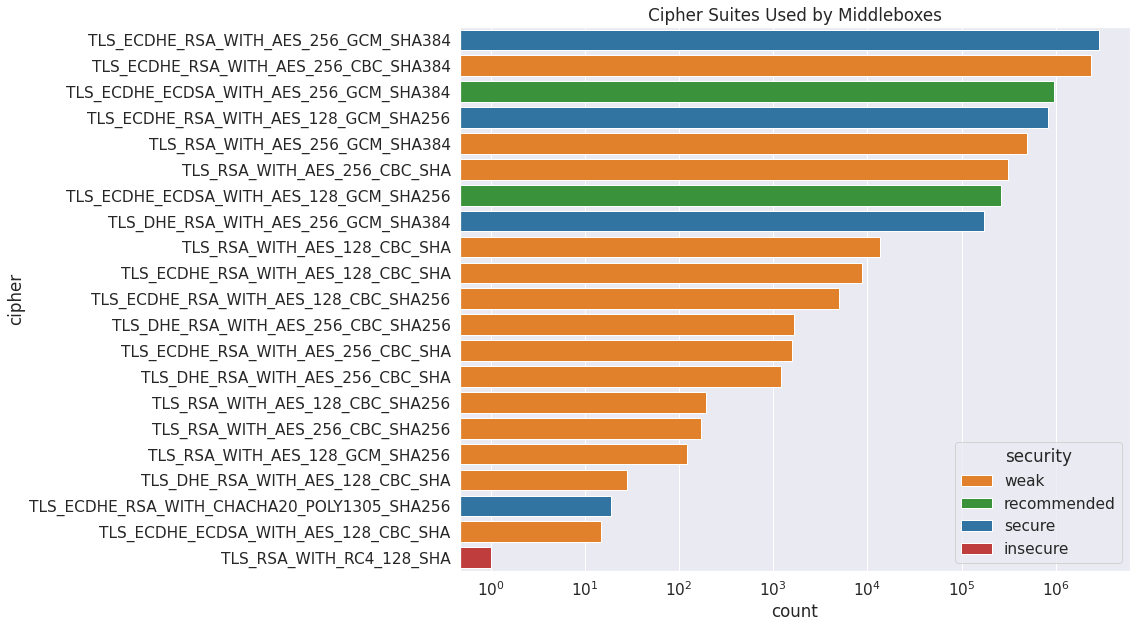

In [13]:
palette = sns.color_palette()
sns.set(font_scale=1.4)
plt.figure(figsize=(12, 10))
cipher_suite_plot = sns.barplot(cipher_df, y="cipher", x="count", hue="security", order=cipher_df.sort_values("count", ascending=False).cipher, palette=colors, dodge=False)
cipher_suite_plot.set_xscale("log")
plt.title("Cipher Suites Used by Middleboxes")

In [14]:
def get_security_pcts(data: Dict, cipher_security: list) -> Dict[str, float]:
    security_values = set(cipher_security.values())
    security_pcts = {}
    total_certs = 0
    for key, value in data.items():
        last_underscore = key.rindex("_")
        if key[last_underscore+1:] in security_values:
            security_pcts[key[last_underscore+1:]] = value
            total_certs += value
    
    for key, value in security_pcts.items():
        security_pcts[key] = value/total_certs
    return security_pcts

In [15]:
security_pcts = get_security_pcts(data, cipher_security)
security_pcts

{'weak': 0.5233054906814286,
 'recommended': 0.018776960162395332,
 'secure': 0.4579123707336271,
 'insecure': 5.178422548923147e-06}

<Figure size 864x720 with 0 Axes>

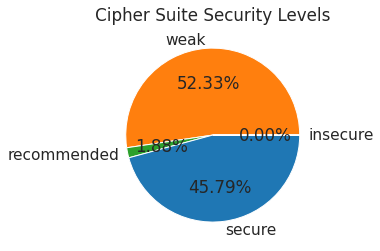

<Figure size 864x720 with 0 Axes>

In [16]:
plt.title("Cipher Suite Security Levels")
colors = [ palette[1], palette[2], palette[0], palette[3]]
plt.pie(security_pcts.values(), labels=security_pcts.keys(), autopct="%1.2f%%", colors=colors)
sns.set(font_scale=1.4)
plt.figure(figsize=(12,10))

In [18]:
data["validity_period_counts_long"]

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 3,
 0,
 2,
 0,
 0,
 4,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 6,
 0,
 6,
 0,
 1]

<Figure size 1152x720 with 0 Axes>

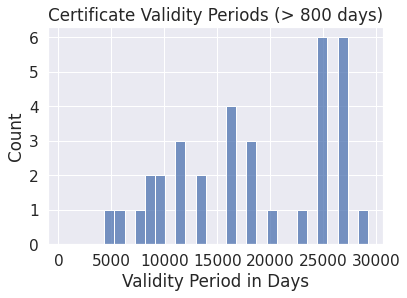

<Figure size 1152x720 with 0 Axes>

In [20]:
import numpy as np
bins = np.array(data["validity_period_bins_long"])
centers = np.mean([bins[:-1], bins[1:]], axis=0)
plot = sns.histplot(x=centers, weights=np.array(data["validity_period_counts_long"]), bins=30)
#plot.set_yscale("log")
plt.title("Certificate Validity Periods (> 800 days)")
plt.xlabel("Validity Period in Days")
sns.set(font_scale=1.4)
plt.figure(figsize=(16,10))

<Figure size 1152x720 with 0 Axes>

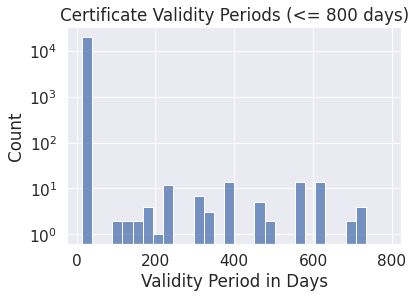

<Figure size 1152x720 with 0 Axes>

In [21]:
bins = np.array(data["validity_period_bins_short"])
centers = np.mean([bins[:-1], bins[1:]], axis=0)
certificate_validity_plot_no_outliers = sns.histplot(x=centers, weights=np.array(data["validity_period_counts_short"]), bins=30)
certificate_validity_plot_no_outliers.set_yscale("log")
plt.title("Certificate Validity Periods (<= 800 days)")
plt.xlabel("Validity Period in Days")
sns.set(font_scale=1.4)
plt.figure(figsize=(16,10))